# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [52]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp
import pandas as pd

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

### Study Notes: 
This part generates a list of random two-dimentional vectors and a list of categorical labels in some certain ways. As is described above: andSplit is a method of generating data such that two classes are linearly split along one of the two dimensions. See the plot below to get the idea. Also check the `cartoon.py` module in `lucem_illud_2020` to see the underlying process. 

In [96]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


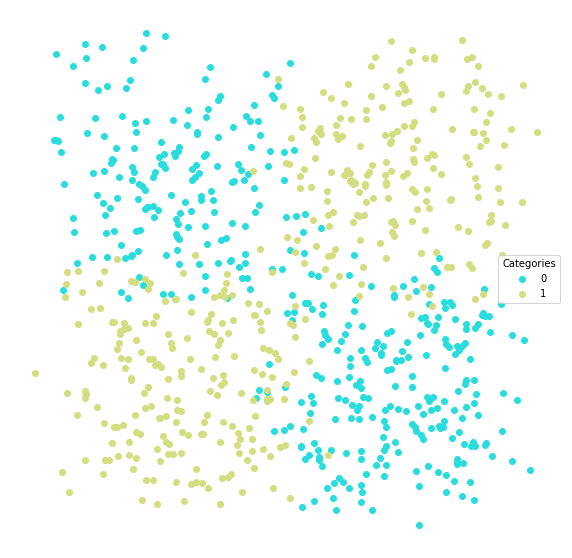

In [97]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [98]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

# Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
# clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [99]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [100]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.08,0.919071,0.934783,0.887409,0.895833
1,0.08,0.919071,0.907407,0.885057,0.942308


This lets us look at which classes do better:

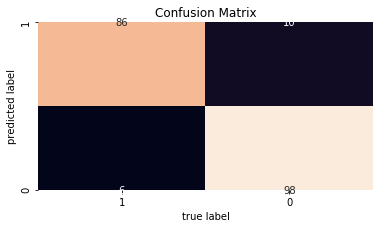

In [101]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

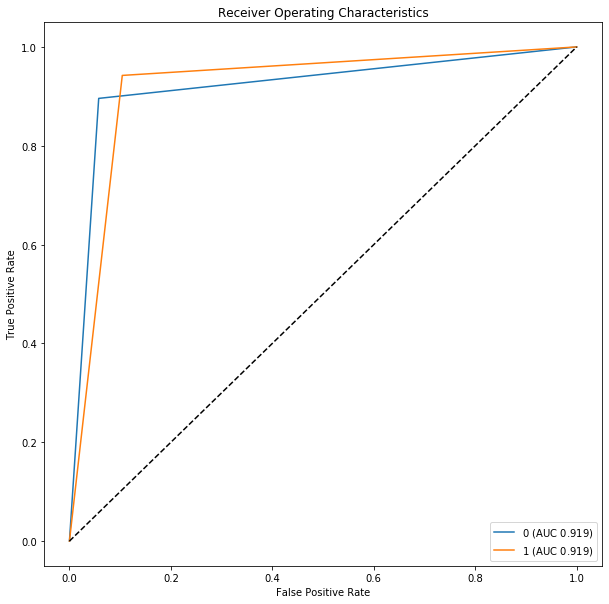

In [102]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


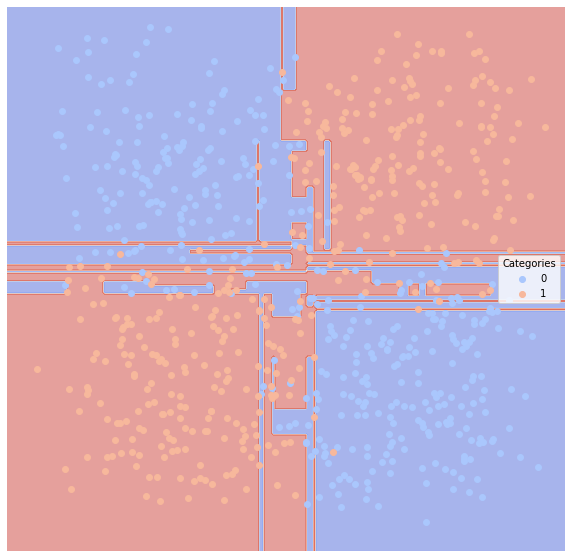

In [103]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [ ]:
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

In [ ]:
#Bayes
# clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

In [ ]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [122]:
# Generate 10 distinct artificial datasets and classify them with all of the available methods
data_generator_dict = {'random': lucem_illud_2020.random, 
                       'andSplit': lucem_illud_2020.andSplit, 
                       'xorSplit': lucem_illud_2020.xorSplit, 
                       'targetSplit': lucem_illud_2020.targetSplit, 
                       'multiBlobs': lucem_illud_2020.multiBlobs}

method_dict = {'Bayes': sklearn.naive_bayes.GaussianNB(), 
               'svc_linear': sklearn.svm.SVC(kernel = 'linear', probability = False), 
               'svc_poly': sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False), 
               'k_neighbors': sklearn.neighbors.KNeighborsClassifier(5, weights='distance'), 
               'logistic': sklearn.linear_model.LogisticRegression(), 
               'decision_tree': sklearn.tree.DecisionTreeClassifier(), 
               'random_forest': sklearn.ensemble.RandomForestClassifier(), 
               'neural_network': sklearn.neural_network.MLPClassifier(), 
               'gradient_boosting': sklearn.ensemble.GradientBoostingClassifier()}


def learning(data_method, classification_method, noise): 
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data_generator_dict[data_method](*noise))
    clf = method_dict[classification_method]
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print('Data generating method: ', data_method, 'noise: ', noise)
    print('Model: ', classification_method)
    print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
    print('\n')

                
for data_method in data_generator_dict: 
    if data_method == 'random': 
        noise = ()
        for classification_method in method_dict: 
            learning(data_method, classification_method, noise)
    else: 
        noise_list = [(0.2, ), (0.5, )]
        for noise in noise_list: 
            for classification_method in method_dict: 
                learning(data_method, classification_method, noise)

Data generating method:  random noise:  ()
Model:  Bayes
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.525  0.47489   0.464646           0.478099  0.469388
1              0.525  0.47489   0.485149           0.498062  0.480392


Data generating method:  random noise:  ()
Model:  svc_linear
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.52  0.482206   0.505495           0.516455  0.438095
1               0.52  0.482206   0.458716           0.466429  0.526316


Data generating method:  random noise:  ()
Model:  svc_poly
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.525  0.476691   0.481928           0.498991  0.392157
1              0.525  0.476691   0.47008

Data generating method:  andSplit noise:  (0.5,)
Model:  neural_network
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.27  0.729673   0.719626           0.668626  0.762376
1               0.27  0.729673   0.741935           0.667107  0.696970


Data generating method:  andSplit noise:  (0.5,)
Model:  gradient_boosting
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.315  0.685419   0.666667           0.619848  0.727273
1              0.315  0.685419   0.706522           0.634692  0.643564


Data generating method:  xorSplit noise:  (0.2,)
Model:  Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.53  0.472902   0.500000           0.517264  0.424528
1    

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Data generating method:  xorSplit noise:  (0.2,)
Model:  neural_network
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.075  0.925983   0.958333           0.910987  0.893204
1              0.075  0.925983   0.894231           0.877355  0.958763


Data generating method:  xorSplit noise:  (0.2,)
Model:  gradient_boosting
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.870175   0.883495           0.835696  0.866667
1               0.13  0.870175   0.855670           0.807585  0.873684


Data generating method:  xorSplit noise:  (0.5,)
Model:  Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.475  0.527111   0.512397           0.504169  0.632653
1    

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0              0.545  0.5      0.455              0.455     1.0
1              0.545  0.5      0.000              0.545     0.0


Data generating method:  targetSplit noise:  (0.2,)
Model:  k_neighbors
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.14  0.85829   0.866667           0.799149  0.829787
1               0.14  0.85829   0.854545           0.817804  0.886792


Data generating method:  targetSplit noise:  (0.2,)
Model:  logistic
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.565  0.435674   0.440860           0.482209  0.401961
1              0.565  0.435674   0.429907           0.461793  0.469388


Data generating method:  targetSp

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Data generating method:  targetSplit noise:  (0.2,)
Model:  neural_network
          Error_Rate     AUC  Precision  Average_Precision    Recall
Category                                                            
0               0.11  0.8884   0.858407           0.838403  0.941748
1               0.11  0.8884   0.931034           0.857462  0.835052


Data generating method:  targetSplit noise:  (0.2,)
Model:  gradient_boosting
          Error_Rate      AUC  Precision  Average_Precision   Recall
Category                                                            
0                0.1  0.89999    0.90099           0.861783  0.90099
1                0.1  0.89999    0.89899           0.858183  0.89899


Data generating method:  targetSplit noise:  (0.5,)
Model:  Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.28  0.721489   0.684211           0.644576  0.795918
1           

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Data generating method:  targetSplit noise:  (0.5,)
Model:  neural_network
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.24  0.76167   0.717172           0.659552  0.780220
1               0.24  0.76167   0.801980           0.735967  0.743119


Data generating method:  targetSplit noise:  (0.5,)
Model:  gradient_boosting
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.25  0.748299   0.720339           0.685282  0.833333
1               0.25  0.748299   0.792683           0.690759  0.663265


Data generating method:  multiBlobs noise:  (0.2,)
Model:  Bayes
          Error_Rate       AUC  Precision  Average_Precision   Recall
Category                                                             
0              0.002  0.995575   1.000000           0.993150  0.99115
1   

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Data generating method:  multiBlobs noise:  (0.2,)
Model:  neural_network
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.008  0.995181   0.955056           0.955056  1.000000
1              0.006  0.986726   1.000000           0.979451  0.973451
2              0.000  1.000000   1.000000           1.000000  1.000000
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.002  0.995238   1.000000           0.992476  0.990476


Data generating method:  multiBlobs noise:  (0.2,)
Model:  gradient_boosting
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.114  0.824926   0.761905           0.608218  0.714286
2              0.114  0.831432   0.692308           0.563878  0.74

Evaluating with regard to precision and error rate, it is shown that: 
- There is no significant difference in the performances of each method for the data generated by `random`. 
- `SVC` with `kernel=linear` works the best among all methods for the data generated by `andSplit`. 
- `Neural Network` works the best among all methods for the data generated by `xorSplit` with a low level of noise. When noise level is larger, there is no significant difference in the performances of each method. 
- `Bayes` works the best among all methods for the data generated by `targetSplit` with a low level of noise. When noise level is larger, `Neural Network` works better. 
- `Bayes` and `Random Forest` work the best among all methods for the data generated by `multiBlobs` with a low level of noise. When noise level is larger, `Bayes` and `Neural Network` work better. 

For the randomly generated data in which there is no obvious pattern, all the methods perform fairly at a large error rate. For the artificial data with a low level of noise, `Naive Bayes` turns out to be a decent estimator, as it makes "each distribution can be independently estimated as a one dimensional distribution"(`scikit-learn` documentation). When the level of noise gets larger, the performance of all the methods become devastated, as the more noise the fewer obvious pattern embeded in the data. For the `SVC` method, it turns out that the choice of kernel is crucial for avoid overfitting. `Rondom Forest` outperformes other methods for the `multiBlobs` data, as it is a multiclass classifier and an ensemble model, which addresses overfitting problem efficiently. 

In [126]:
corpus_list = [lucem_illud_2020.loadReddit, 
               lucem_illud_2020.loadNewsGroups, 
               lucem_illud_2020.loadSenateSmall, 
               lucem_illud_2020.loadSenateLarge, 
               lucem_illud_2020.loadSpam]


def learning_realdata(corpus, classification_method, dfTrain, dfTest): 
    clf = method_dict[classification_method]
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print('Data: ', corpus)
    print('Model: ', classification_method)
    print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
    print('\n')

In [127]:
corpus_data = []
for corpus in corpus_list: 
    corpus_data.append(lucem_illud_2020.trainTestSplit(corpus()))

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [128]:
for data in corpus_data: 
    dfTrain, dfTest = data[0], data[1]
    for index, classification_method in enumerate(method_dict): 
            learning_realdata(corpus_list[index], classification_method, dfTrain, dfTest)

Data:  <function loadSpam at 0x1a27604e60>
Model:  Bayes
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.169279  0.706907   0.734694           0.472020   
Tales From Tech Support    0.068966  0.873348   0.935484           0.770348   
Bad Roommates              0.141066  0.797391   0.753425           0.589985   
Weeaboo Tales              0.184953  0.859169   0.592593           0.576913   

                           Recall  
Category                           
Relationships            0.467532  
Tales From Tech Support  0.763158  
Bad Roommates            0.670732  
Weeaboo Tales            0.952381  


Data:  <function loadSpam at 0x1a27604e60>
Model:  svc_linear
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.0

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                         Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                      
Relationships              0.241379  0.5   0.000000           0.241379     0.0
Tales From Tech Support    0.761755  0.5   0.238245           0.238245     1.0
Bad Roommates              0.257053  0.5   0.000000           0.257053     0.0
Weeaboo Tales              0.263323  0.5   0.000000           0.263323     0.0


Data:  <function loadSpam at 0x1a27604e60>
Model:  k_neighbors
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.072100  0.881641   0.897059           0.760814   
Tales From Tech Support    0.028213  0.949832   0.971831           0.904264   
Bad Roommates              0.059561  0.912061   0.909091           0.813671   
Weeaboo Tales              0.078370  0.935334   0.786408          

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
comp.sys.mac.hardware    0.238298  0.5   0.000000           0.238298     0.0
misc.forsale             0.274468  0.5   0.000000           0.274468     0.0
comp.windows.x           0.780851  0.5   0.219149           0.219149     1.0
rec.autos                0.268085  0.5   0.000000           0.268085     0.0


Data:  <function loadSpam at 0x1a27604e60>
Model:  k_neighbors
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.sys.mac.hardware    0.378723  0.515189   0.257353           0.244253   
misc.forsale             0.265957  0.520323   0.750000           0.296586   
comp.windows.x           0.189362  0.571453   0.937500           0.323763   
rec.autos                0.574468  0.499423   0.267742           0.267859   

          

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
Clinton     0.431085  0.5   0.568915           0.568915     1.0
Obama       0.431085  0.5   0.000000           0.431085     0.0


Data:  <function loadSpam at 0x1a27604e60>
Model:  k_neighbors
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.134897  0.860842   0.873737           0.840741  0.891753
Obama       0.134897  0.860842   0.853147           0.781368  0.829932


Data:  <function loadSpam at 0x1a27604e60>
Model:  logistic
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.041056  0.952381   0.932692           0.932692  1.000000
Obama       0.041056  0.952381   1.000000           0.945818  0.904762


Data:  <function loadSpam at 0x1a27604e60>
Mode

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


           Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                        
Klobuchar    0.101282  0.5   0.000000           0.101282     0.0
Kyl          0.130769  0.5   0.000000           0.130769     0.0
Kerry        0.243590  0.5   0.000000           0.243590     0.0
Kennedy      0.558974  0.5   0.441026           0.441026     1.0
Kohl         0.083333  0.5   0.000000           0.083333     0.0


Data:  <function loadSpam at 0x1a27604e60>
Model:  k_neighbors
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Klobuchar    0.038462  0.855053   0.876923           0.660922  0.721519
Kyl          0.047436  0.856108   0.891566           0.682720  0.725490
Kerry        0.144872  0.763292   0.765517           0.548505  0.584211
Kennedy      0.169231  0.842183   0.744240           0.725729  0.938953
Kohl         0.035897  0.840559   0.849057      

/Users/lucient/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
spam        0.140351  0.5   0.000000           0.140351     0.0
not spam    0.140351  0.5   0.859649           0.859649     1.0


Data:  <function loadSpam at 0x1a27604e60>
Model:  k_neighbors
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.090643  0.729379   0.793103           0.453128  0.479167
not spam    0.090643  0.729379   0.920128           0.918894  0.979592


Data:  <function loadSpam at 0x1a27604e60>
Model:  logistic
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.105263  0.638074   0.900000           0.354002  0.281250
not spam    0.105263  0.638074   0.894495           0.894318  0.994898


Data:  <function loadSpam at 0x1a27604e60>
Mode

Evaluating with regard to precision and error rate, it is shown that: 
- `SVC` with `kernel=linear` works the best among all methods for the `Reddit Threads` data, and `Logistic Regression` works fine as well. 
- `SVC` with `kernel=linear` and `Logistic Regression` work the best among all methods for the `Newsgroups` data. 
- `SVC` with `kernel=linear` and `Gradient Tree Boosting` work the best among all methods for the `Senate (2)` data, and `Decision Tree` works fine as well. 
- `Decision Tree` and `Gradient Tree Boosting` work the best among all methods for the `Senate (5)` data. 
- `Neural Network` works the best among all methods for the `Email` data. 


In [135]:
# Try to use `RidgeClassifier` for the `xorSplit` artificial data. 
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data_generator_dict['xorSplit'](0.2))
clf = sklearn.linear_model.RidgeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print('Data generating method: ', 'xorSplit', 'noise: ', 0.2)
print('Model: ', 'RidgeClassifier')
print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
print('\n')

# Try to use `RidgeClassifier` for the `Email` data. 
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print('Data: ', 'Email')
print('Model: ', 'RidgeClassifier')
print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
print('\n')

Data generating method:  multiBlobs noise:  (0.5,)
Model:  RidgeClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.485  0.531886   0.600000           0.572027  0.378378
1              0.485  0.531886   0.469231           0.461608  0.685393


Loading Spam
Loading Ham
Converting to vectors
Data:  Email
Model:  RidgeClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.080409  0.757627   0.852459           0.519577  0.530612
not spam    0.080409  0.757627   0.926164           0.925097  0.984642




Evaluating based on precision and error rate, `RidgeClassifier` shows similar performance as `Naive Bayes` and `Logistic Regression` do for the artificial data generated by `xorSplit`. It outperforms `Logistic Regression`, `Bayes`, and `Gradient Tree Boosting` for the `Email` data but is much worse than others. According to the documentation, "this classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case)."

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [3]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [4]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [5]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [6]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [7]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [8]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [9]:
TFVects.shape

(1368, 11448)

We can save this in the dataframe to make things easier

In [10]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [11]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [12]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


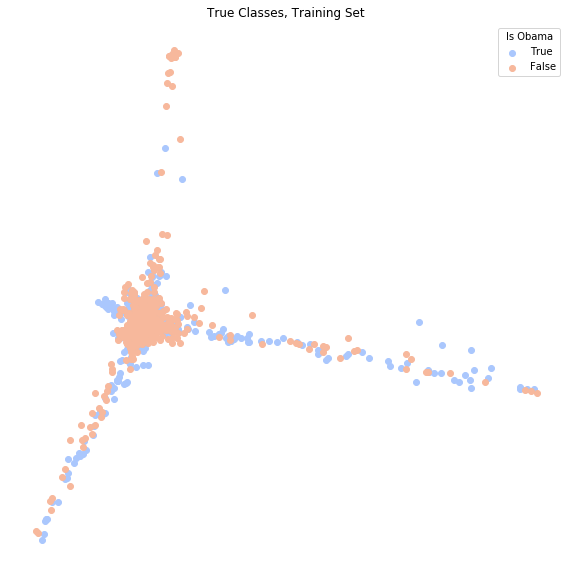

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

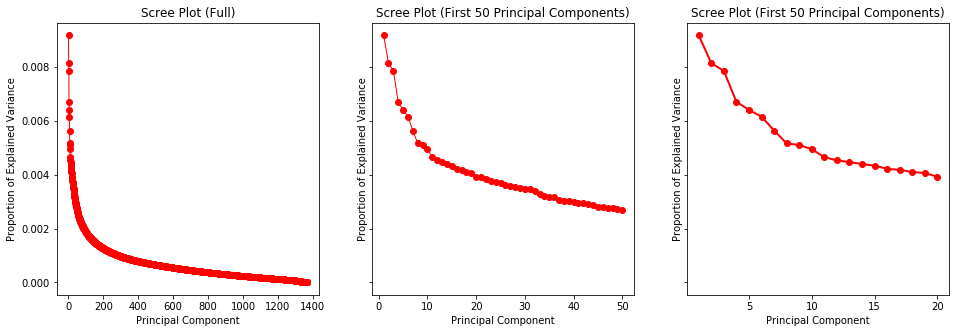

In [14]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [15]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [16]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [17]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6578947368421053

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [18]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6891495601173021

Slightly poorer. How about using more dimensions (40)?

In [19]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7521929824561403
Testing:
0.750733137829912


Or still more (100)?

In [20]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8267543859649122
Testing:
0.8005865102639296


Or even more (200)!

In [21]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8720760233918129
Testing:
0.8240469208211144


This is becoming ridiculous (400)!

In [22]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9173976608187134
Testing:
0.8357771260997068


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [23]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9634502923976608


Train the model using training data, and then test it on the testing data.

In [24]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8475073313782991


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [25]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9714912280701754
Testing:
0.8680351906158358


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [27]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [28]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.7843137254901961

Recall:

In [29]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.9090909090909091

F1-measure:

In [30]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8421052631578948

Let's take a look at how well our posterior distribution looks relative to the truth.

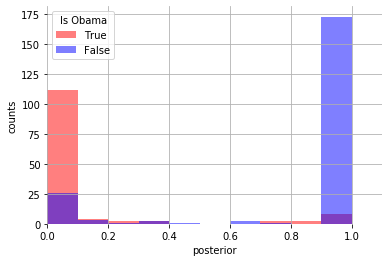

In [31]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [32]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.209915,5566,-1.746182
1,announcement,-2.256983,amy,-1.818008
2,welcomed,-2.269104,brundage,-1.906955
3,awarded,-2.293797,dick,-1.906955
4,fy,-2.306375,chicago,-2.004594
5,created,-2.399157,reform,-2.171648
6,class,-2.413143,temporary,-2.218168
7,urging,-2.413143,accountability,-2.266958
8,read,-2.427328,location,-2.266958
9,ground,-2.441717,oversight,-2.353969


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [33]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [34]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [35]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [36]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [37]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [38]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [39]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [40]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8891468369123622


In [41]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
1668,comp.graphics,comp.graphics
1410,sci.space,sci.space
588,soc.religion.christian,soc.religion.christian
23,talk.religion.misc,talk.religion.misc
1455,sci.space,sci.space
1673,comp.graphics,comp.graphics
826,soc.religion.christian,soc.religion.christian
1407,sci.space,sci.space
1211,sci.space,sci.space
142,talk.religion.misc,soc.religion.christian


Looks pretty good, lets examine the testing dataset:

In [42]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.786046511627907


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

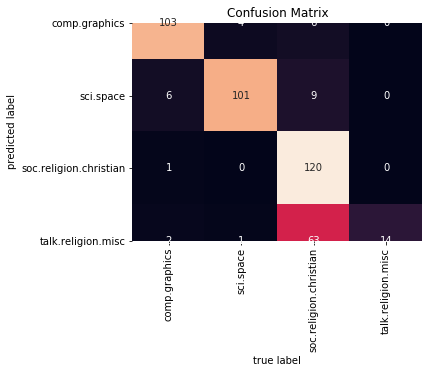

In [43]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [44]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.9144075241561243
0.786046511627907
0.8189032620465336


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [45]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.graphics,0.044186,0.941557,0.919643,0.861514,0.911504
soc.religion.christian,0.183721,0.869654,0.606061,0.603377,0.991736
sci.space,0.046512,0.927383,0.952830,0.864503,0.870690
talk.religion.misc,0.153488,0.587500,1.000000,0.328488,0.175000


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

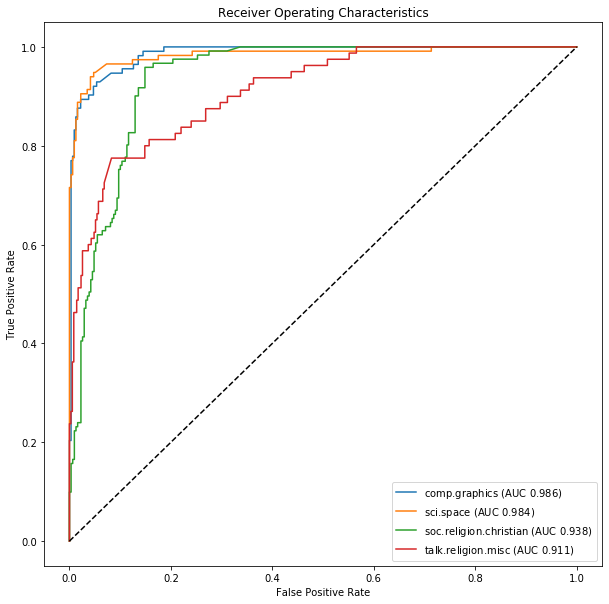

In [46]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

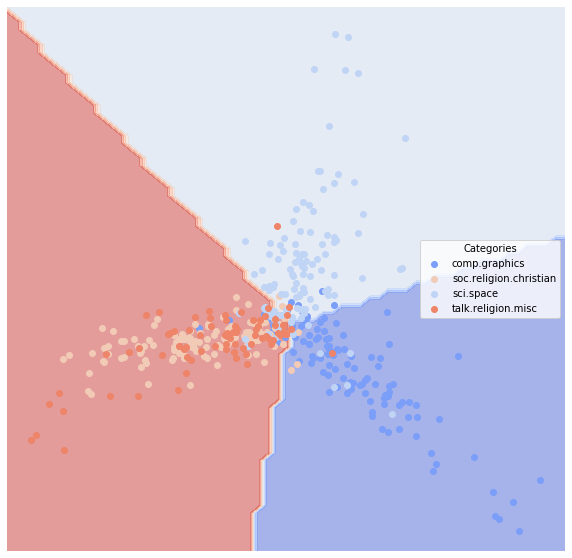

In [47]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


I will perform sentiment classification on a corpus that retrieves text from an online discussion forum with a subset of hand-coded data. 

Corpus source citation: L. Reed, J. Wu, S. Oraby, P. Anand, and M. Walker. "Learning Lexical-Functional Patterns for First-Person Sentiment." in the Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL). Vancouver, Canada. 2017. 

## Exercise2 - Logistic Regression with TF-IDF scores for each word

In [53]:
# Load the text files
text_list = []
sentiment_list = []
for filename in os.listdir('./coded/pos/'):
    if filename.endswith(".txt"): 
        with open('./coded/pos/'+filename, 'r') as fhand: 
            text_list.append(fhand.read())
            sentiment_list.append(1)

for filename in os.listdir('./coded/neg/'):
    if filename.endswith(".txt"): 
        with open('./coded/neg/'+filename, 'r') as fhand: 
            text_list.append(fhand.read())
            sentiment_list.append(0)

text_data_df = pd.DataFrame(data={'sentence': text_list, 'if_pos': sentiment_list})

In [65]:
# Reduce the sample size to save time of heavy computing
text_data_head_df = text_data_df.sample(frac=0.2)

In [67]:
# Tokenize text data
text_data_head_df['tokenized_text'] = text_data_head_df['sentence'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
text_data_head_df['normalized_text'] = text_data_head_df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [104]:
# Split into training and testing datasets. 
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(text_data_head_df, holdBackFraction=holdBackFraction)

# Turn the training dataset into a tf-idf matrix and vectorize text data using normalized text. 
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform([' '.join(l) for l in train_data_df['normalized_text']])

In [105]:
# Train the model
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos'])

# Check the score of fitting the training set
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos']))

0.7805818436733263


In [106]:
# Turn the testing dataset into a tf-idf matrix and vectorize text data using normalized text. 
TFVects_test = TFVectorizer.transform(test_data_df['sentence'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

# Check the score of fitting the testing set
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['if_pos']))

0.7146862951279355


In [107]:
# Save the prediction results into the dataframe. 
test_data_df['logreg_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['logreg_predict_prob_true'] = logistic_l1.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] 

In [108]:
# print(sklearn.metrics.precision_score(test_data_df['if_pos'], test_data_df['logreg_predict']))
# print(sklearn.metrics.recall_score(test_data_df['if_pos'], test_data_df['logreg_predict']))
# print(sklearn.metrics.f1_score(test_data_df['if_pos'], test_data_df['logreg_predict']))

# Use lucem_illud_2020 to evaluate the classifier. 
# To do this, we need to change the name of the label column into 'category' to be identified by lucem_illud_2020
test_data_df['category'] = test_data_df['if_pos']
print(lucem_illud_2020.evaluateClassifier(logistic_l1, test_data_df))

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.285314  0.612236   0.659817           0.432970  0.302935
1           0.285314  0.612236   0.724638           0.720007  0.921538


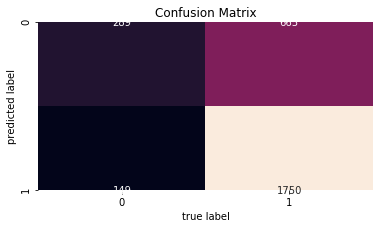

In [109]:
# Visualize the Confusion Matrix
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

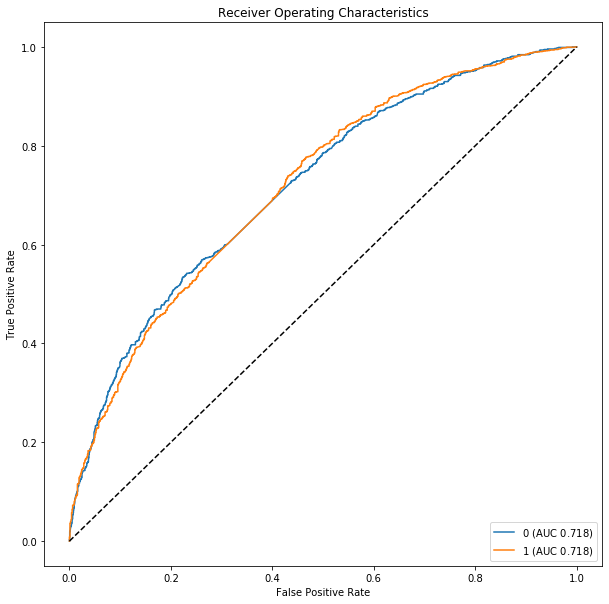

In [110]:
# Plot the ROC visualization
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

In [111]:
# Extraplot the model to uncoded data. 

# Load the uncoded data files
text_list = []
for filename in os.listdir('./uncoded/'):
    if filename.endswith(".txt"): 
        with open('./uncoded/'+filename, 'r') as fhand: 
            text_list.append(fhand.read())
            
uncoded_data_df = pd.DataFrame(data={'sentence': text_list})

In [114]:
# Tokenized the uncoded data
uncoded_data_df['tokenized_text'] = uncoded_data_df['sentence'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
uncoded_data_df['normalized_text'] = uncoded_data_df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

# Turn the uncoded dataset into a tf-idf matrix and vectorize text data using normalized text. 
TFVects_uncoded = TFVectorizer.transform([' '.join(l) for l in uncoded_data_df['normalized_text']])
uncoded_data_df['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]

In [117]:
# Perform prediction for the uncoded dataset using the trained model. 
uncoded_data_df['logreg_predict'] = logistic_l1.predict(np.stack(uncoded_data_df['vect'], axis=0))

In [118]:
# View the results
uncoded_data_df[['sentence', 'logreg_predict']]

,sentence,logreg_predict
0,"I started to verbally agonize, it was like a w...",0
1,It's a big bag of juice covered in dead skin.,1
2,We couldn't let today go without some fall-typ...,1
3,I figure that I must be some sort of magnifice...,1
4,Christmas shopping is going to be difficult be...,1
...,...,...
1247,"Well, I'm babbling now, but I got this off my ...",0
1248,So I put my bag and keys back down and settle ...,1
1249,And it made me realize how we have become so e...,1
1250,"Ok, I might be exaggerating but I really don't...",1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


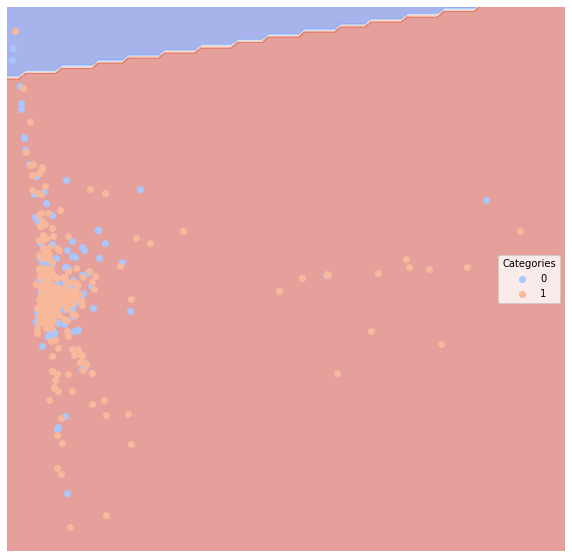

In [136]:
uncoded_data_df['category'] = uncoded_data_df['logreg_predict']
lucem_illud_2020.plotregions(logistic_l1, uncoded_data_df)

## Exercise2 - Naive Bayes 

In [120]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos'])
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['if_pos']))

Training:
0.7904837013669821
Testing:
0.7136347704171048


In [121]:
# Save the prediction results into the dataframe. 
test_data_df['naibay_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['naibay_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] 

In [122]:
# Use lucem_illud_2020 to evaluate the classifier. 
# To do this, we need to change the name of the label column into 'category' to be identified by lucem_illud_2020
test_data_df['category'] = test_data_df['if_pos']
print(lucem_illud_2020.evaluateClassifier(naiveBayes, test_data_df))

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.286365  0.636484   0.608215           0.444893  0.403564
1           0.286365  0.636484   0.743694           0.733497  0.869405


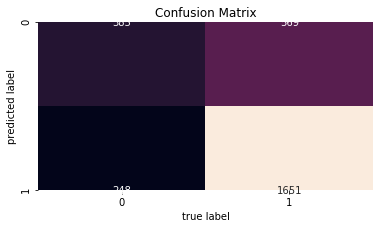

In [123]:
# Visualize the Confusion Matrix
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

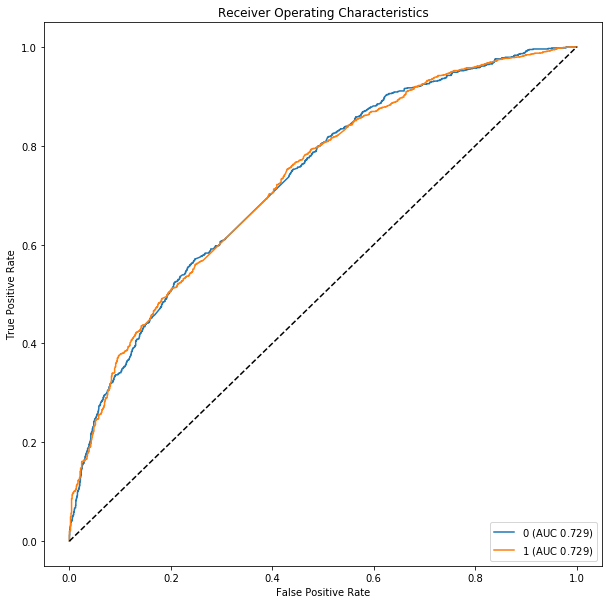

In [124]:
# Plot the ROC visualization
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

In [ ]:
lucem_illud_2020.plotregions(naiveBayes, test_data_df)

In [125]:
# Perform prediction for the uncoded dataset using the trained model. 
uncoded_data_df['naibay_predict'] = naiveBayes.predict(np.stack(uncoded_data_df['vect'], axis=0))

In [133]:
# View the results
uncoded_data_df[['sentence', 'naibay_predict']]

,sentence,naibay_predict
0,"I started to verbally agonize, it was like a w...",1
1,It's a big bag of juice covered in dead skin.,1
2,We couldn't let today go without some fall-typ...,1
3,I figure that I must be some sort of magnifice...,1
4,Christmas shopping is going to be difficult be...,0
...,...,...
1247,"Well, I'm babbling now, but I got this off my ...",0
1248,So I put my bag and keys back down and settle ...,1
1249,And it made me realize how we have become so e...,1
1250,"Ok, I might be exaggerating but I really don't...",1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


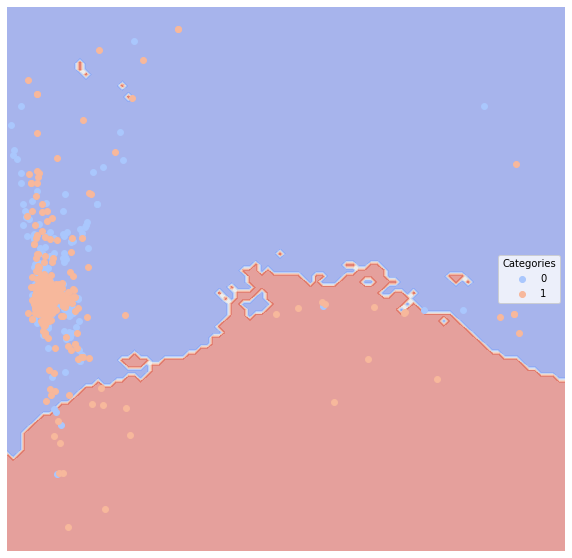

In [134]:
uncoded_data_df['category'] = uncoded_data_df['naibay_predict']
lucem_illud_2020.plotregions(naiveBayes, uncoded_data_df)

### __Comments__: 

Naive Bayes and Logistic Regression have similar performance with. The results are not reliable enough to give accurate classification result. __However, I note that here I only used 20% of the hand-coded data in order to avoid heavy computing, which can seriously davascate the performance of the model.__ If full dataset had been used, either Logistic Regression or Bayes is expected to give decent classification result, as is shown in the example of Obama/Clinton classification task. 

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

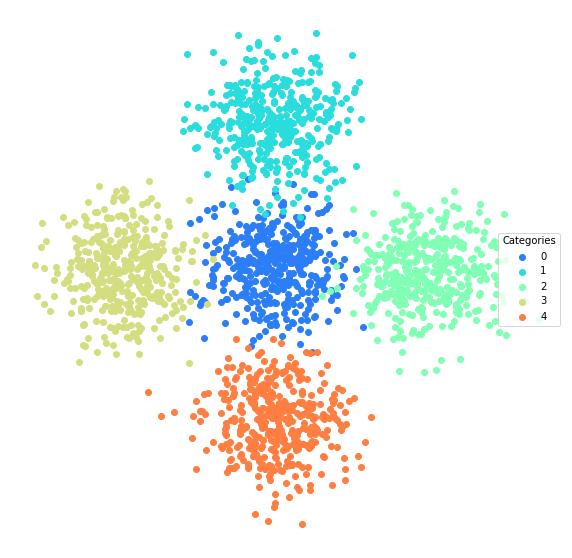

In [127]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [129]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

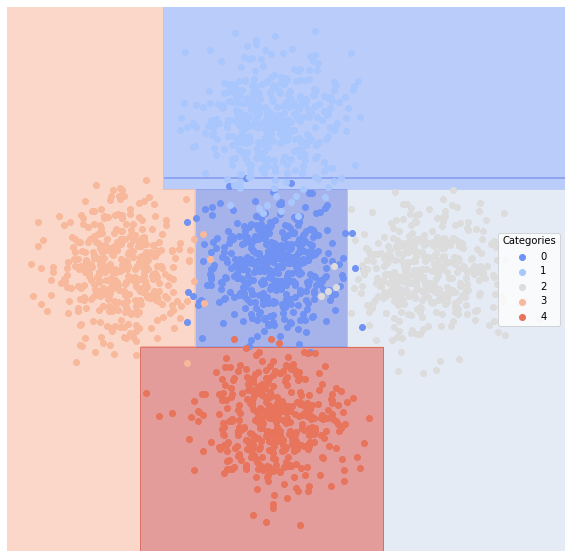

In [130]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [137]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.963483,0.956989,0.908548,0.936842
1,0.006,0.987905,0.989011,0.971511,0.978261
2,0.004,0.997487,0.980769,0.980769,1.000000
3,0.008,0.988566,0.982301,0.968915,0.982301
4,0.010,0.986065,0.969697,0.953907,0.979592


Lets look at accuracy:

In [138]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.976

What happens if we trim the tree?

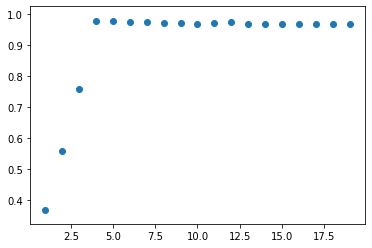

In [139]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [140]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [141]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

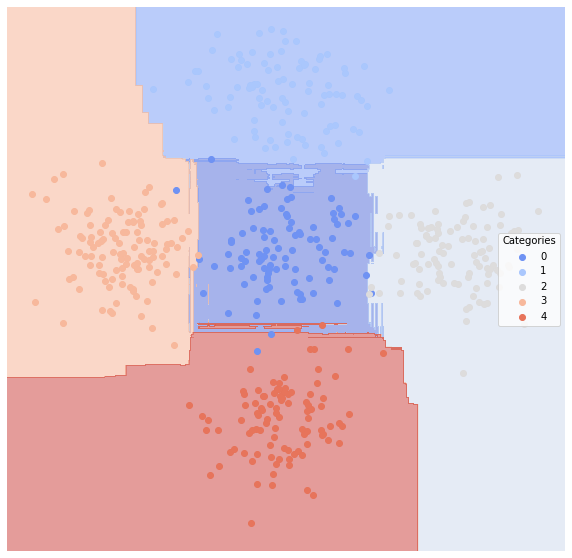

In [142]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [143]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.016,0.974009,0.957895,0.925562,0.957895
1,0.002,0.994565,1.000000,0.991130,0.989130
2,0.002,0.998744,0.990291,0.990291,1.000000
3,0.004,0.994283,0.991150,0.984379,0.991150
4,0.008,0.987308,0.979592,0.963600,0.979592


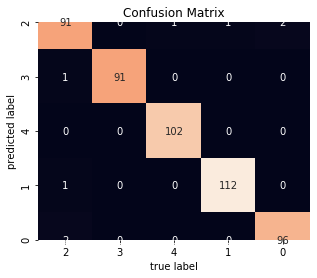

In [144]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

## Exercise3 - Decision Tree

In [164]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=30,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['if_pos'])
print("Training:")
print(clf_tree.score(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos']))
print("Testing:")
print(clf_tree.score(np.stack(test_data_df['vect'], axis=0), test_data_df['if_pos']))

Training:
0.7101296880476691
Testing:
0.6869961444093936


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


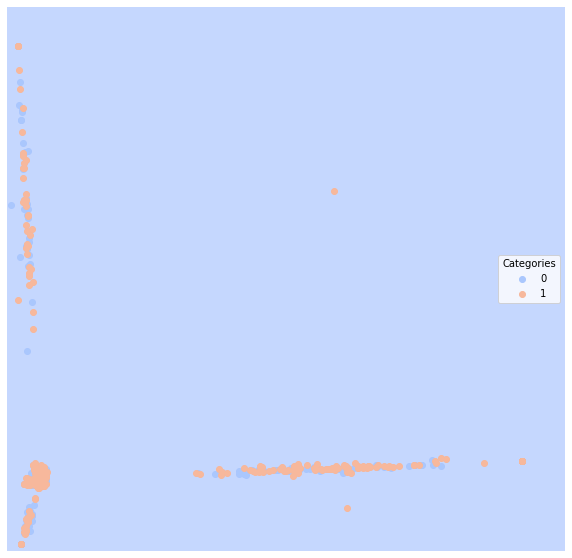

In [165]:
lucem_illud_2020.plotregions(clf_tree, test_data_df)

In [166]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.313004,0.54788,0.666667,0.376878,0.127883
1,0.313004,0.54788,0.688390,0.687658,0.967878


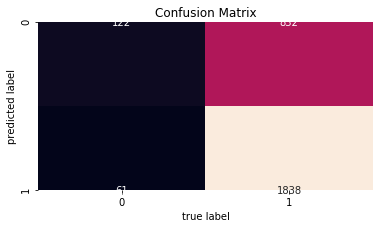

In [167]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_data_df)

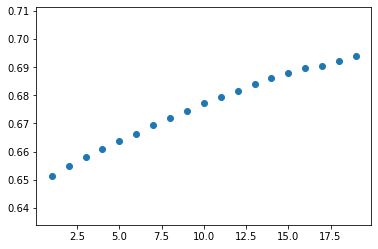

In [163]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['if_pos'])
    score = sklearn.metrics.accuracy_score(train_data_df['if_pos'], tree2.predict(np.stack(train_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

### __Comments:__

Decision Tree has a weak performance on this task with a low level of accuracy and high error rates. The fitting on the train dataset is poor as well, which may be due to the relatively small size of the dataset (the hand-coded data has been randomly dropped to avoid heavy computing). The graph above indiates there is no overfitting even with `max_depth=30`. The bagging method may be expected to have better performance since it corporates multiple estimators. 

## Exercise3 - Random Forest (An Ensemble Method)

In [169]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=30) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [170]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['if_pos']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=30,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


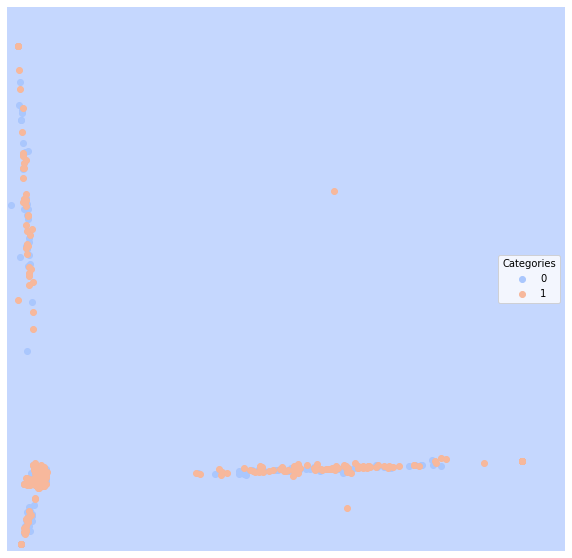

In [171]:
lucem_illud_2020.plotregions(bag, test_data_df)

In [172]:
lucem_illud_2020.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.308798,0.554691,0.683417,0.384142,0.142558
1,0.308798,0.554691,0.691786,0.690918,0.966825


In [175]:
train_data_df['category'] = train_data_df['if_pos']
lucem_illud_2020.evaluateClassifier(bag, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.280319,0.604556,0.965169,0.483483,0.213310
1,0.280319,0.604556,0.698917,0.698699,0.995802


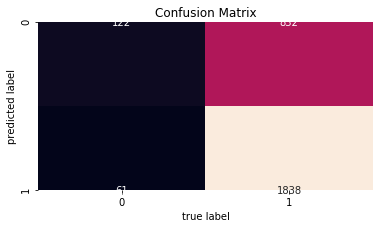

In [173]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_data_df)

### __Comments:__

The performance of the bagging method is not satisfying again with a low precision level and high error rates. The performance on the training data is weak either. This seems to be due to the reduced size of hand-coded data that is used to train and test the model, which may further diminish the significance of pattern embeded in the data. 

Ensemble learning methods corporate the results of multiple methods and are expected to be able to obtain better performance than that could be obtained from any single learning algorithm that a ensemble method integrate. In this example, the bagging method uses 100 tree estimators and each tree uses up to 80% of the data to perform the task and give the final result. 

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [176]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, better..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [177]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [178]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [179]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [180]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [181]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.218224,0.620968,1.000000,0.460160,0.241935
sci.space,0.295415,0.717693,0.476447,0.425473,0.746835
comp.graphics,0.350551,0.667763,0.401774,0.360269,0.706013
talk.religion.misc,0.135229,0.616776,1.000000,0.368782,0.233553


And lets look at the testing data

In [182]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.313953488372093


Let's produce another confusion matrix:

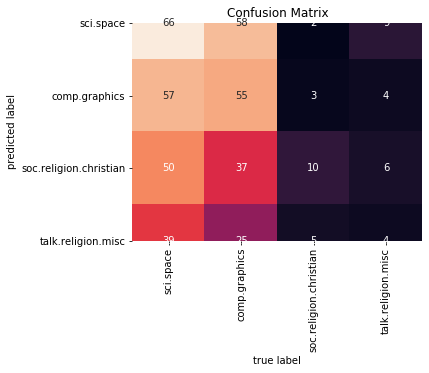

In [183]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [184]:
# Initiate a K-nearest Neighbor classifier. 
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [185]:
# The whole dataset has already been tokenized and vectorized using the tf-idf vectors. 

In [188]:
# Train the model using the training subset. 
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['if_pos'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [189]:
# Evaluate the classifier on the training subset. 
lucem_illud_2020.evaluateClassifier(clf_knearest, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.301262,0.601642,0.684178,0.442878,0.271666
1,0.301262,0.601642,0.701111,0.697419,0.931618


In [191]:
# Calculate the scores: 
print("Training score:")
print(clf_knearest.score(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos']))
print("Testing score:")
print(clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['if_pos']))

Training score:
0.6987381703470031
Testing score:
0.6722747984577637


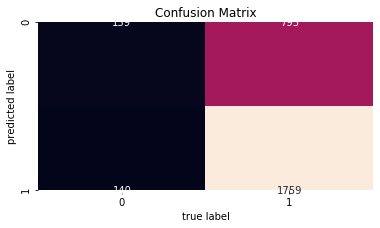

In [192]:
# Plot the confusion matrix on the testing dataset. 
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_data_df)

K-nearest Neighbor method has similar performance with the methods used above, but it is much more time-consuming. 

K-means Clustering is an unsupervised learning model while K-nearest Neighbor is a supervised learning model. They are used for different tasks. K-means Clustering uses unlabelled data to learn the pattern of clustering the observations into seperated groups by evaluating the mean distances between points. K-nearest Neighbor uses labelled data for classification, in which the attributes are already known, but also aming at understanding the real pattern embeded in the data. 

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [193]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [194]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [195]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [196]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [197]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.009404,0.993878,0.961039,0.961039,1.000000
Bad Roommates: Tales of Irritation,0.018809,0.968110,0.987500,0.944394,0.940476
Relationships,0.018809,0.983477,0.945055,0.937327,0.988506
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.979730,1.000000,0.968864,0.959459


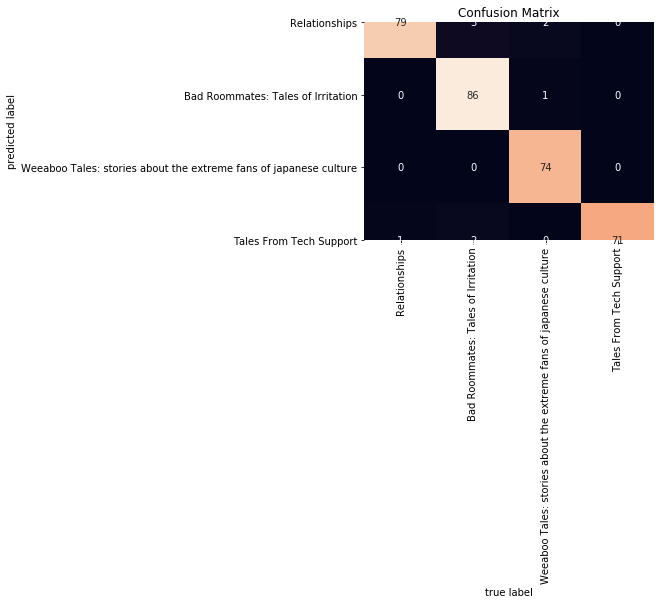

In [198]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

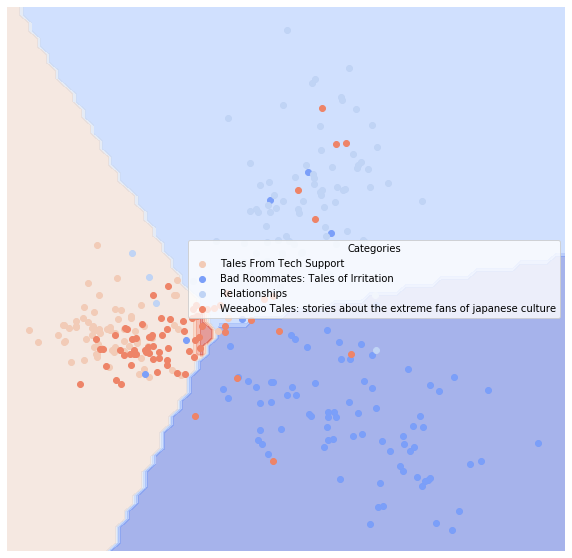

In [199]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [200]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [201]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.012539,0.991837,0.948718,0.948718,1.000000
Bad Roommates: Tales of Irritation,0.018809,0.968110,0.987500,0.944394,0.940476
Relationships,0.009404,0.986351,0.988372,0.971920,0.977011
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.989162,0.973333,0.963315,0.986486


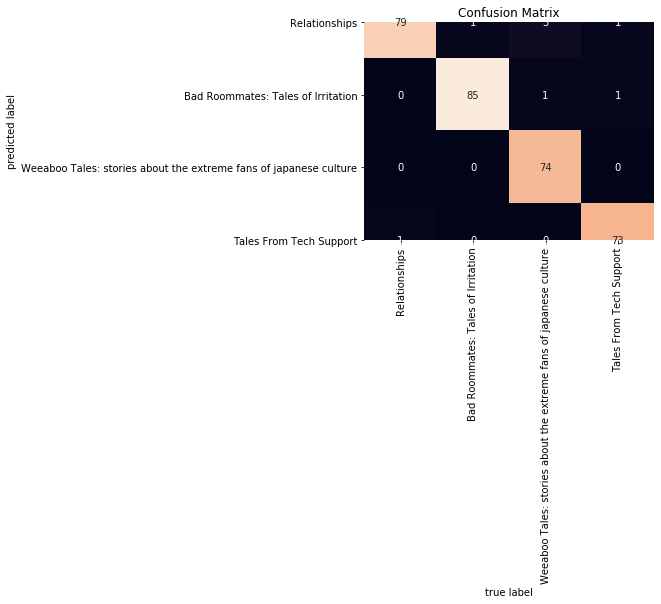

In [202]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

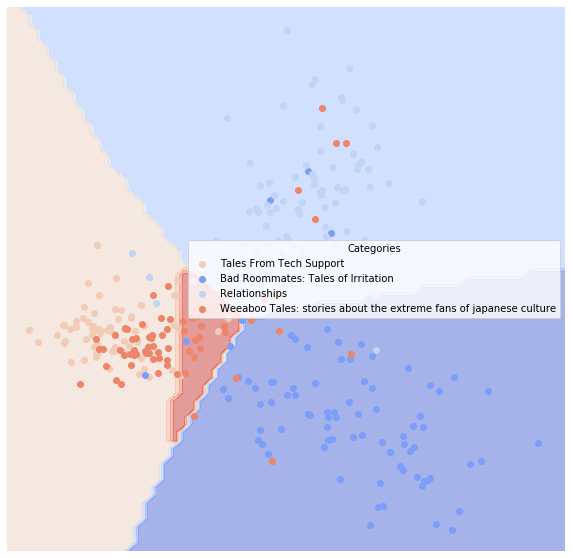

In [203]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [204]:
# Initiate a neural network classifier
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['if_pos'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [205]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.332632,0.609815,0.503023,0.407921,0.436059
1,0.332632,0.609815,0.734452,0.719554,0.783570


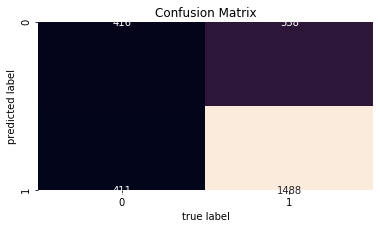

In [206]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


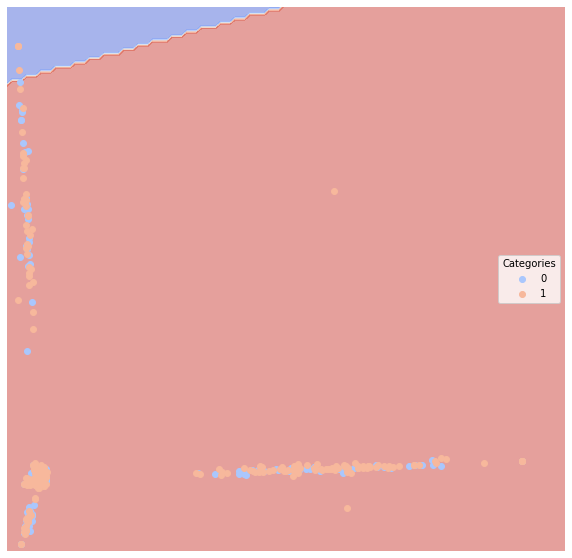

In [207]:
lucem_illud_2020.plotregions(clf_nn, test_data_df)

### __Comments:__

The Neural Network method has similar performance with that of k-nearest neighbor, Naive Bayes, logistic and decision-tree approaches on this specific classification task. 